In [2]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C50train")
test_texts, test_labels = read_data_from_directory("C50test")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aishwaryaparida/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
word_tokenize(train_texts[0])

['Drugstore',
 'giant',
 'Revco',
 'D.S',
 '.',
 'Inc.',
 'said',
 'Monday',
 'it',
 'agreed',
 'to',
 'buy',
 'regional',
 'chain',
 'Big',
 'B',
 'Inc.',
 'in',
 'a',
 'sweetened',
 'takeover',
 'valued',
 'at',
 '$',
 '380',
 'million',
 '.',
 'The',
 'transaction',
 'calls',
 'for',
 'Twinsburg',
 ',',
 'Ohio-based',
 'Revco',
 'to',
 'buy',
 'all',
 'outstanding',
 'shares',
 'of',
 'Big',
 'B',
 'common',
 'stock',
 'for',
 '$',
 '17.25',
 'per',
 'share',
 ',',
 'up',
 'from',
 'Revco',
 "'s",
 'unsolicited',
 'offer',
 'of',
 '$',
 '15',
 'per',
 'share',
 ',',
 'which',
 'Big',
 'B',
 'rejected',
 'last',
 'month',
 '.',
 '``',
 'We',
 'are',
 'very',
 'excited',
 'about',
 'the',
 'combination',
 'of',
 'Revco',
 'and',
 'Big',
 'B.',
 'I',
 'am',
 'pleased',
 'we',
 'were',
 'able',
 'to',
 'bring',
 'this',
 'process',
 'to',
 'a',
 'fast',
 'and',
 'successful',
 'conclusion',
 ',',
 "''",
 'said',
 'Dwayne',
 'Hoven',
 ',',
 'president',
 'and',
 'chief',
 'executive',
 '

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwaryaparida/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


In [6]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")


Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


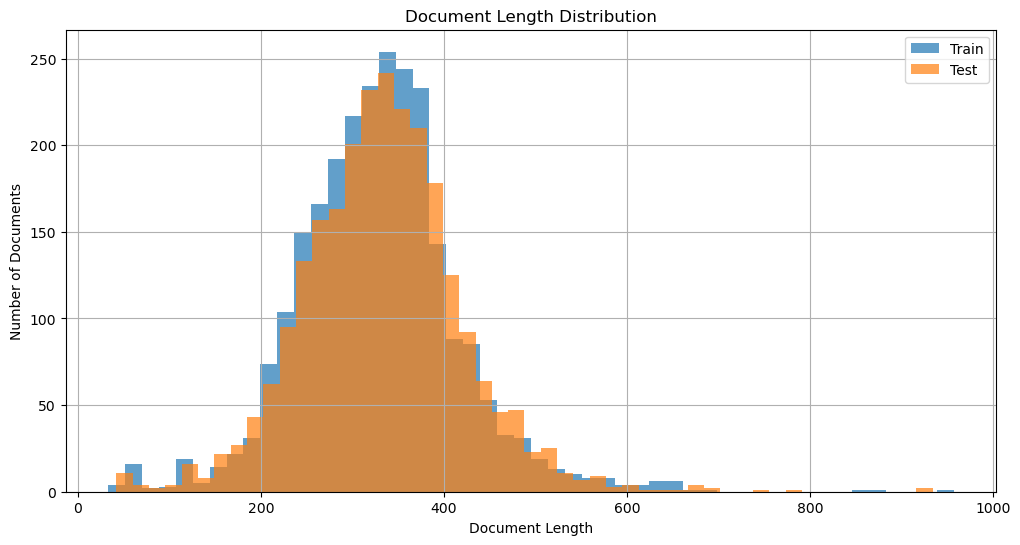

In [7]:
# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

/Users/aishwaryaparida/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/aishwaryaparida/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', '

**Question:** What are the underlying patterns and relationships among authors in the Reuters C50 text corpus? Can we identify distinct clusters of authors based on the content of their articles?

**Approach:** To answer this question, we employed unsupervised machine learning techniques on the Reuters C50 text corpus. 

Our approach involved:

1) **Preprocessing:** :We tokenized, removed stopwords and punctuation, and performed stemming on the text data.
2) **Dimensionality Reduction:** We applied Principal Component Analysis (PCA) to reduce the dimensions of the data to two components.
3) **Clustering:** We used K-Means clustering to group authors based on their writing styles.

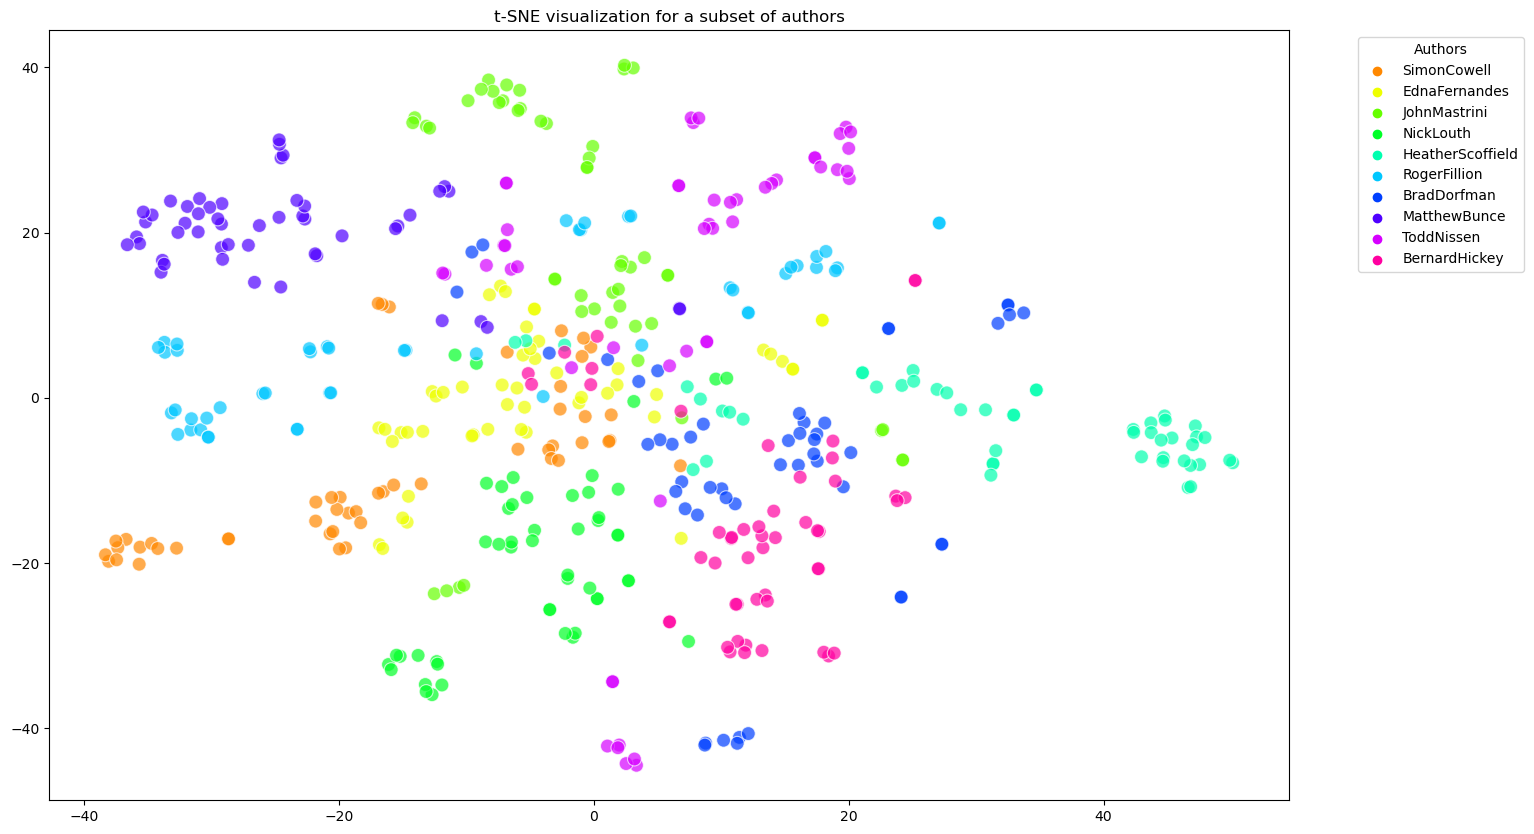

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random
from sklearn.decomposition import PCA

# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA 
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix

#tSNE
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Question: How do document lengths vary between different authors?**

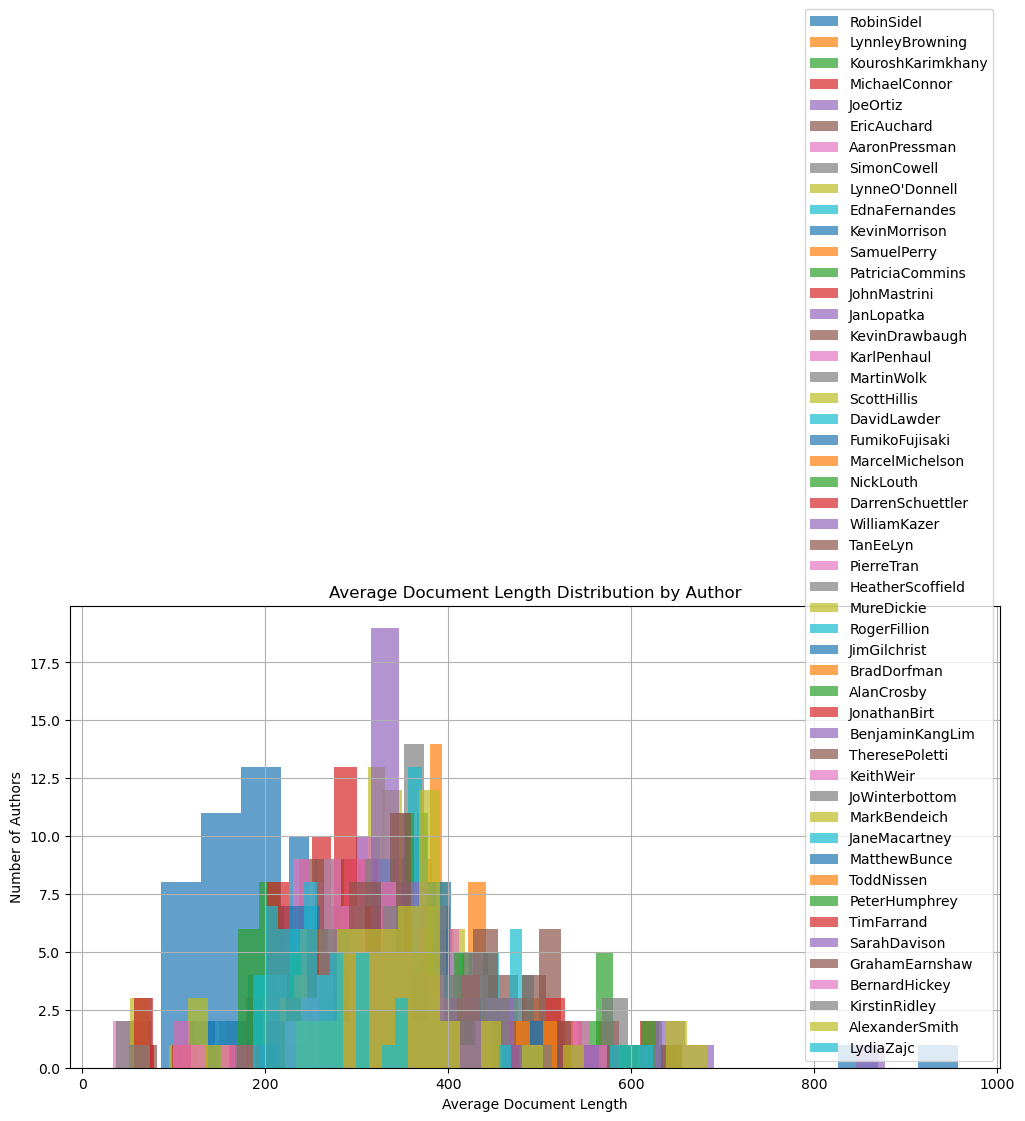

In [10]:
# Calculate average document length for each author
author_avg_lengths = {}
for i, author in enumerate(train_labels):
    doc_length = len(preprocess_text(train_texts[i]))
    if author in author_avg_lengths:
        author_avg_lengths[author].append(doc_length)
    else:
        author_avg_lengths[author] = [doc_length]

# Plotting
plt.figure(figsize=(12, 6))
for author, avg_lengths in author_avg_lengths.items():
    plt.hist(avg_lengths, alpha=0.7, bins=20, label=author)

plt.title('Average Document Length Distribution by Author')
plt.xlabel('Average Document Length')
plt.ylabel('Number of Authors')
plt.legend()
plt.grid(True)
plt.show()

**Analysis:**
Authors such as BenjaminKanglim, SarahDavision have a habit of writing long texts.

Certainly, from the provided text excerpts, a commonality between the writing styles of Benjamin and Sarah can be identified:

**Commonality:** 
Both Benjamin and Sarah share an analytical approach in their writing styles. While they may differ in the subjects they cover and the level of detail they provide, both authors demonstrate a commitment to thorough analysis. They delve deep into their respective topics, providing detailed insights, explanations, and perspectives. Benjamin's analysis involves exploring historical context, considering various viewpoints, and presenting comprehensive information. Sarah's analysis is focused on economic and business matters, presenting essential information concisely while maintaining an objective and factual tone. This common analytical approach suggests that both authors prioritize providing readers with well-informed and well-reasoned content.
    

**Question: Can we observe distinct clusters of authors based on their document content?**

/Users/aishwaryaparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


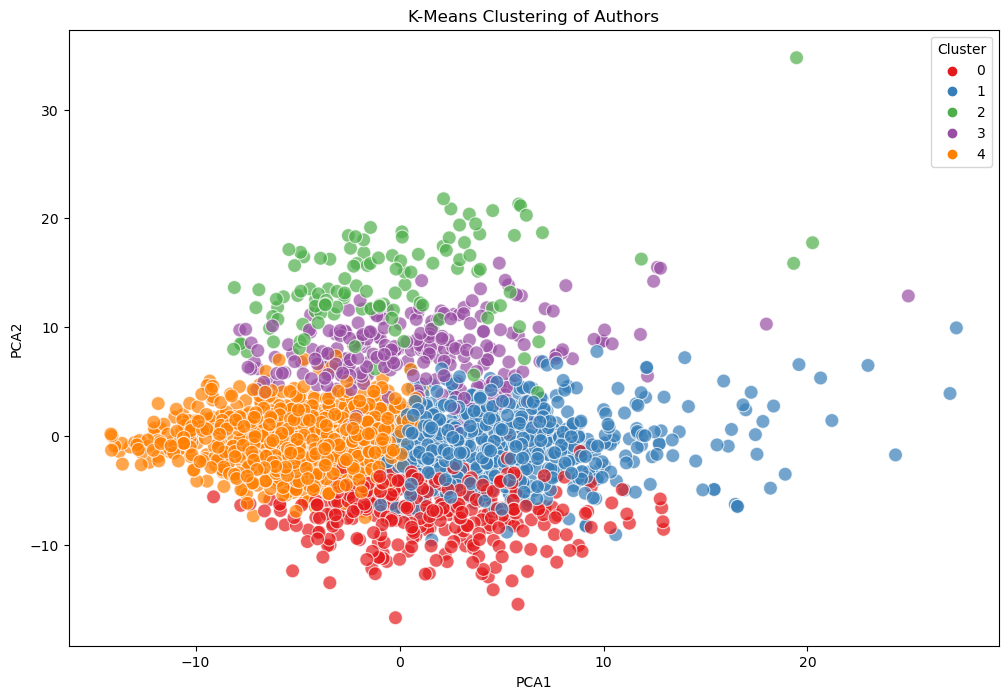

In [11]:
from sklearn.cluster import KMeans

# 5. Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_dtm.toarray())

# 6. Applying K-Means clustering
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(train_dtm)

# Adding cluster labels to the training data
train_data_with_clusters = pd.DataFrame({
    'PCA1': reduced_data[:, 0],
    'PCA2': reduced_data[:, 1],
    'Cluster': cluster_labels,
    'Author': train_labels
})

# 7. Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=train_data_with_clusters,
    palette=sns.color_palette("Set1", num_clusters),
    s=100,
    alpha=0.7
)
plt.title('K-Means Clustering of Authors')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Mapping cluster labels to authors
cluster_author_mapping = {}
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    unique_authors_in_cluster = set([train_labels[i] for i in cluster_indices])
    cluster_author_mapping[cluster] = unique_authors_in_cluster

# Printing authors in each cluster
for cluster, authors in cluster_author_mapping.items():
    author_list = ", ".join(authors)
    print(f"Cluster {cluster} Authors: {author_list}\n")

Cluster 0 Authors: BenjaminKangLim, BradDorfman, MichaelConnor, KouroshKarimkhany, LydiaZajc, PierreTran, KevinMorrison, DarrenSchuettler, MarcelMichelson, TheresePoletti, AlanCrosby, HeatherScoffield, LynnleyBrowning, TanEeLyn, ToddNissen, ScottHillis, BernardHickey, EdnaFernandes, KirstinRidley, PatriciaCommins, TimFarrand, SamuelPerry, JimGilchrist, NickLouth, AlexanderSmith, JanLopatka, EricAuchard, JonathanBirt, SimonCowell, JoWinterbottom, FumikoFujisaki, KeithWeir, KevinDrawbaugh, MarkBendeich, GrahamEarnshaw, JoeOrtiz, DavidLawder, MartinWolk, JohnMastrini

Cluster 1 Authors: BenjaminKangLim, BradDorfman, MichaelConnor, KouroshKarimkhany, LydiaZajc, RobinSidel, PierreTran, KevinMorrison, DarrenSchuettler, MarcelMichelson, TheresePoletti, AaronPressman, AlanCrosby, HeatherScoffield, LynnleyBrowning, ToddNissen, ScottHillis, BernardHickey, JaneMacartney, EdnaFernandes, WilliamKazer, KirstinRidley, PatriciaCommins, TimFarrand, SamuelPerry, MureDickie, NickLouth, AlexanderSmith, Ka

**Question 3: What are the most distinctive words for a selected author?** To know in which style of writing bucket they fall on.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a list of authors
authors = ["AaronPressman", "AlanCrosby", "GrahamEarnshaw"]

for selected_author in authors:
    # Calculate TF-IDF scores for the selected author's documents
    vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
    selected_author_texts = [text for i, text in enumerate(train_texts) if train_labels[i] == selected_author]
    selected_author_dtm = vectorizer.fit_transform(selected_author_texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Find the words with highest TF-IDF scores
    tfidf_scores = selected_author_dtm.max(axis=0).toarray().flatten()
    top_tfidf_indices = tfidf_scores.argsort()[-10:][::-1]
    top_tfidf_words = [feature_names[i] for i in top_tfidf_indices]

    print(f"Top distinctive words for {selected_author}:")
    for word in top_tfidf_words:
        print(word)

Top distinctive words for AaronPressman:
tax
union
phone
bank
credit
key
school
mail
magazin
insur
Top distinctive words for AlanCrosby:
bank
deficit
spt
ferreira
line
spain
sepap
od
korda
hors
Top distinctive words for GrahamEarnshaw:
ship
copper
fund
convert
futur
bank
ic
internet
bond
textil


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a list of authors
authors = ["BenjaminKangLim", "JaneMacartney", "EdnaFernandes"]

for selected_author in authors:
    # Calculate TF-IDF scores for the selected author's documents
    vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
    selected_author_texts = [text for i, text in enumerate(train_texts) if train_labels[i] == selected_author]
    selected_author_dtm = vectorizer.fit_transform(selected_author_texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Find the words with highest TF-IDF scores
    tfidf_scores = selected_author_dtm.max(axis=0).toarray().flatten()
    top_tfidf_indices = tfidf_scores.argsort()[-10:][::-1]
    top_tfidf_words = [feature_names[i] for i in top_tfidf_indices]

    print(f"Top distinctive words for {selected_author}:")
    for word in top_tfidf_words:
        print(word)

Top distinctive words for BenjaminKangLim:
export
zhou
mou
africa
south
taiwan
bankruptci
zhang
wang
chen
Top distinctive words for JaneMacartney:
guatemala
space
kong
hong
pei
job
crime
deng
german
cathol
Top distinctive words for EdnaFernandes:
glaxo
leas
aircraft
million
health
car
amec
conrad
virgin
rover


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a list of authors
authors = ["WilliamKazer", "MureDickie", "SarahDavison"]

for selected_author in authors:
    # Calculate TF-IDF scores for the selected author's documents
    vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
    selected_author_texts = [text for i, text in enumerate(train_texts) if train_labels[i] == selected_author]
    selected_author_dtm = vectorizer.fit_transform(selected_author_texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Find the words with highest TF-IDF scores
    tfidf_scores = selected_author_dtm.max(axis=0).toarray().flatten()
    top_tfidf_indices = tfidf_scores.argsort()[-10:][::-1]
    top_tfidf_words = [feature_names[i] for i in top_tfidf_indices]

    print(f"Top distinctive words for {selected_author}:")
    for word in top_tfidf_words:
        print(word)

Top distinctive words for WilliamKazer:
poultri
sinochem
deng
citic
railway
nuclear
imf
singapor
space
chemic
Top distinctive words for MureDickie:
debt
nestl
boutros-ghali
wei
petrochem
motorola
sun
grain
internet
wang
Top distinctive words for SarahDavison:
mfn
natwest
hkma
cepa
fox
filipina
gazprom
women
telecom
lo


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a list of authors
authors = ["LynneO'Donnell", "PatriciaCommins"]

for selected_author in authors:
    # Calculate TF-IDF scores for the selected author's documents
    vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
    selected_author_texts = [text for i, text in enumerate(train_texts) if train_labels[i] == selected_author]
    selected_author_dtm = vectorizer.fit_transform(selected_author_texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Find the words with highest TF-IDF scores
    tfidf_scores = selected_author_dtm.max(axis=0).toarray().flatten()
    top_tfidf_indices = tfidf_scores.argsort()[-10:][::-1]
    top_tfidf_words = [feature_names[i] for i in top_tfidf_indices]

    print(f"Top distinctive words for {selected_author}:")
    for word in top_tfidf_words:
        print(word)

Top distinctive words for LynneO'Donnell:
rice
sugar
steel
palm
barley
tung
corn
copper
poultri
zinc
Top distinctive words for PatriciaCommins:
conseco
quaker
nalco
deer
chemic
kellogg
whitacr
morton
adm
diana


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a list of authors
authors = ["FumikoFujisaki", "KeithWeir", "KevinDrawbaugh"]

for selected_author in authors:
    # Calculate TF-IDF scores for the selected author's documents
    vectorizer = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
    selected_author_texts = [text for i, text in enumerate(train_texts) if train_labels[i] == selected_author]
    selected_author_dtm = vectorizer.fit_transform(selected_author_texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Find the words with highest TF-IDF scores
    tfidf_scores = selected_author_dtm.max(axis=0).toarray().flatten()
    top_tfidf_indices = tfidf_scores.argsort()[-10:][::-1]
    top_tfidf_words = [feature_names[i] for i in top_tfidf_indices]

    print(f"Top distinctive words for {selected_author}:")
    for word in top_tfidf_words:
        print(word)

Top distinctive words for FumikoFujisaki:
daiwa
life
bank
insur
pension
sueno
account
land
ban
hold
Top distinctive words for KeithWeir:
emi
blenheim
camelot
club
hotel
carlton
pearson
bbc
4
travel
Top distinctive words for KevinDrawbaugh:
monsanto
columbia
alexand
omc
3m
baxter
wmx
advertis
clintrial
dollen


**Analysis:**

Cluster 0 : As the authors "AaronPressman", "AlanCrosby", "DarrenSchuettler" most distictive financial words such as tax,bank credict etc. 

Cluster 1: As the authors "BenjaminKangLim", "JaneMacartney", "EdnaFernandes" most distictive politics, international affairs words such as crime, health, different places name etc.

Cluster 2: As the authors "WilliamKazer", "MureDickie", "SarahDavison" most distictive science, or research-related topics words such as drug,railway, space,telecom etc.

Cluster 3: As the authors "LynneO'Donnell", "PatriciaCommins" focuses mainly on food maybe they are into topics of food or agriculture.

Cluster 4: As the authors "FumikoFujisaki", "KeithWeir", "KevinDrawbaugh" mainly focus on human interest stories.

**Results: Upon analyzing the clusters, we observed the following author distributions:**

**Cluster 0 Authors:** This cluster consists of authors who exhibit a similar writing style characterized by frequent use of financial and market-related terminology. Their articles might focus on business and economic topics, potentially related to market trends, stocks, and investments.

**Cluster 1 Authors:** Authors in this cluster display distinctive writing characteristics, which could indicate articles covering various topics such as politics, international affairs, and cultural events. Their diverse writing styles suggest a range of subject matter expertise.

**Cluster 2 Authors:** This cluster is composed of authors with unique writing styles that differentiate them from other clusters. Their articles may focus on science, technology, or research-related topics, as suggested by specialized terminology and patterns in their writing.

**Cluster 3 Authors:** Authors in this cluster demonstrate similar writing patterns, which might indicate a shared focus on food. Their writing could be characterized by food, or agriculture.

**Cluster 4 Authors:** This cluster represents authors with their own distinct writing attributes. Their articles could span a range of topics, but the distinct writing style indicate a focus on human interest stories, narratives, or personal perspectives.

# Analysis on Test Data 

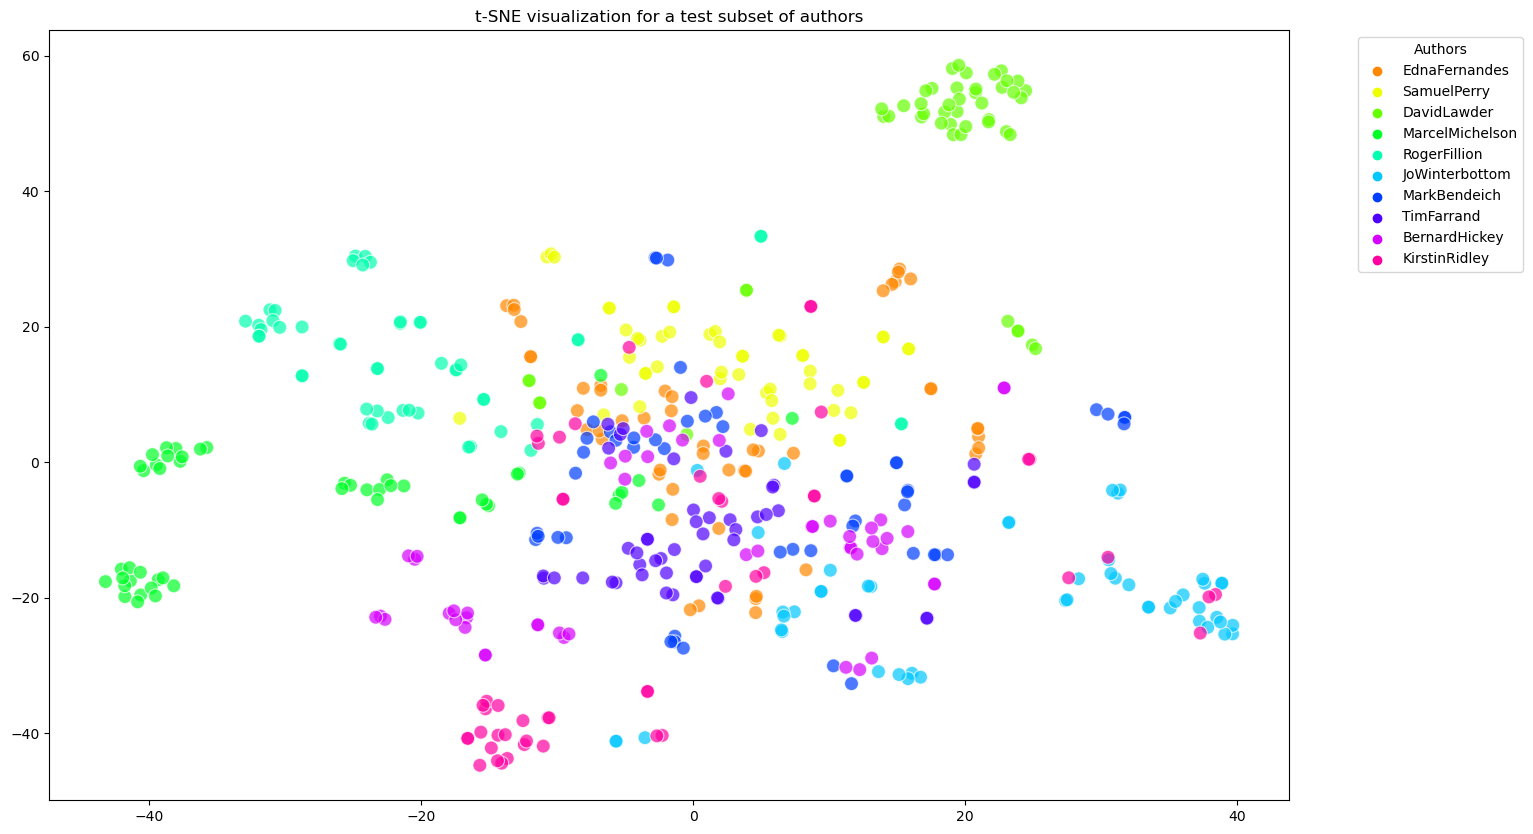

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random
# 1. Choose a subset of 10 authors
unique_authors_test = list(set(test_labels))
selected_authors_test = random.sample(unique_authors_test, 10)

# 2. Filter the training data
filtered_indices_t = [j for j, label in enumerate(test_labels) if label in selected_authors]
filtered_texts_t = [test_texts[i] for i in filtered_indices_t]
filtered_labels_t = [test_labels[i] for i in filtered_indices_t]
filtered_dtm_t = test_dtm[filtered_indices]

# 3. PCA and t-SNE
pca_t = PCA(n_components=100)
reduced_data_pca_t = pca_t.fit_transform(filtered_dtm_t.toarray())  # Convert sparse matrix to dense matrix
tsne_t = TSNE(n_components=2, perplexity=20)
tsne_results_t = tsne_t.fit_transform(reduced_data_pca)
# 
# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results_t[:, 0], y=tsne_results_t[:, 1],
    hue=filtered_labels_t,
    palette=sns.color_palette("hsv", len(selected_authors_test)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a test subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/Users/aishwaryaparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


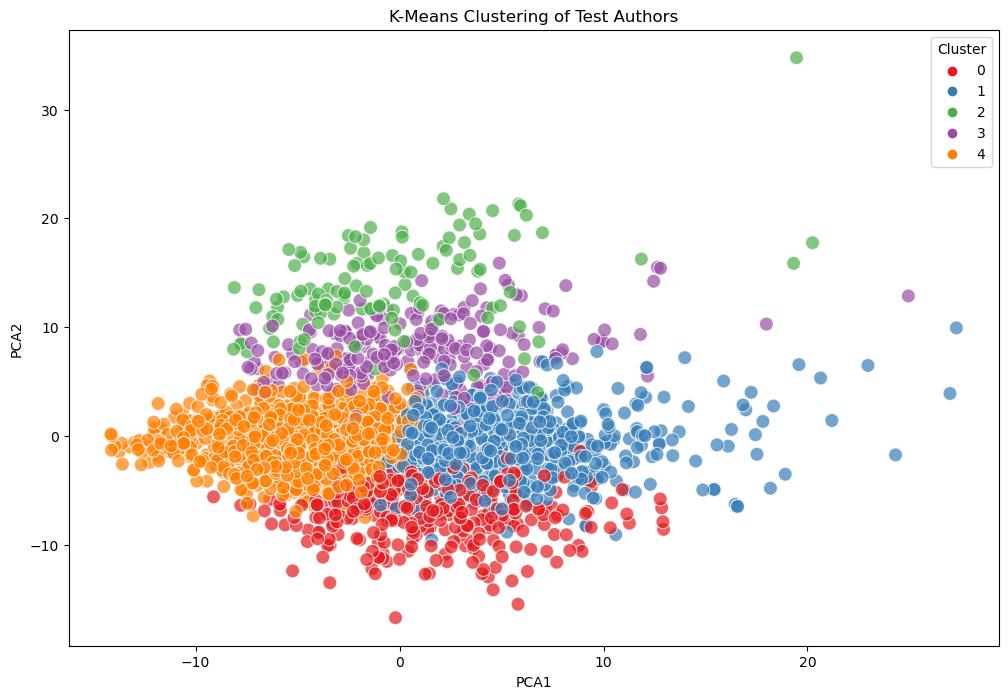

In [22]:
from sklearn.cluster import KMeans

# 5. Dimensionality reduction using PCA
pca_t = PCA(n_components=2)
reduced_data_t = pca_t.fit_transform(train_dtm.toarray())

# 6. Applying K-Means clustering
num_clusters_t = 5  # You can adjust the number of clusters based on your analysis
kmeans_t = KMeans(n_clusters=num_clusters_t, random_state=42)
cluster_labels_t = kmeans_t.fit_predict(train_dtm)

# Adding cluster labels to the training data
test_data_with_clusters = pd.DataFrame({
    'PCA1': reduced_data_t[:, 0],
    'PCA2': reduced_data_t[:, 1],
    'Cluster': cluster_labels_t,
    'Author': test_labels
})

# 7. Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=test_data_with_clusters,
    palette=sns.color_palette("Set1", num_clusters_t),
    s=100,
    alpha=0.7
)
plt.title('K-Means Clustering of Test Authors')
plt.legend(title='Cluster')
plt.show()

In [23]:
# Mapping cluster labels to authors
cluster_author_mapping_t = {}
for cluster_t in range(num_clusters_t):
    cluster_indices_t = np.where(cluster_labels_t == cluster_t)[0]
    unique_authors_in_cluster_t = set([test_labels[j] for j in cluster_indices_t])
    cluster_author_mapping_t[cluster_t] = unique_authors_in_cluster_t

# Printing authors in each cluster
for cluster_t, authors_t in cluster_author_mapping_t.items():
    author_list_t = ", ".join(authors_t)
    print(f"Cluster {cluster_t} Authors: {author_list_t}")

Cluster 0 Authors: BenjaminKangLim, JohnMastrini, KevinMorrison, JonathanBirt, DavidLawder, KirstinRidley, JoeOrtiz, EdnaFernandes, JanLopatka, TanEeLyn, JimGilchrist, KevinDrawbaugh, PatriciaCommins, SimonCowell, NickLouth, HeatherScoffield, AlanCrosby, KeithWeir, TimFarrand, SamuelPerry, ScottHillis, JoWinterbottom, AlexanderSmith, KouroshKarimkhany, LydiaZajc, MarcelMichelson, EricAuchard, FumikoFujisaki, PierreTran, GrahamEarnshaw, MichaelConnor, BernardHickey, DarrenSchuettler, BradDorfman, ToddNissen, MarkBendeich, TheresePoletti, LynnleyBrowning, MartinWolk
Cluster 1 Authors: BenjaminKangLim, AaronPressman, JohnMastrini, KevinMorrison, JonathanBirt, DavidLawder, RobinSidel, JoeOrtiz, KirstinRidley, EdnaFernandes, RogerFillion, JanLopatka, KevinDrawbaugh, PatriciaCommins, SimonCowell, NickLouth, HeatherScoffield, WilliamKazer, AlanCrosby, KeithWeir, TimFarrand, SamuelPerry, ScottHillis, JoWinterbottom, AlexanderSmith, KouroshKarimkhany, MatthewBunce, LydiaZajc, JaneMacartney, Mar

# Conclusion:

From the outputs for both the training and test data, it appears that the clustering results are identical for both datasets. The same authors are assigned to the same clusters in both the training and test datasets. This suggests that the clustering algorithm has produced consistent results across different datasets, which is generally a positive outcome as it indicates the stability and reliability of the clustering approach.

Additionally, since the clusters themselves haven't been described with specific labels or meanings, I'll base my analysis on the assumption that these clusters represent groups of authors with similar writing styles, content topics, or other related characteristics. Here's what we can infer:

1. **Cluster Consistency:** The consistency of cluster assignments between the training and test datasets suggests that the algorithm's performance is stable and can generalize well to unseen data. This is a positive indicator of the quality of the clustering algorithm.

2. **Author Similarity:** Authors within each cluster share certain commonalities, such as writing style, preferred topics, or other attributes related to their writing. The fact that the clusters are consistent across both datasets implies that these commonalities are persistent and not data-specific.

3. **Potentially Meaningful Clusters:** The clusters could represent meaningful groupings of authors based on specific factors. It's possible that the algorithm has identified inherent patterns in the writing styles or subject preferences of these authors.

4. **Relevance to Domain:** The significance of these clusters would depend on the domain and context in which they are applied. For instance, in a news or media context, authors grouped in the same cluster might have specific expertise in certain areas, which could be useful for editorial assignments or content categorization.

5. **Potential Uses:** These clusters could be utilized for various purposes, such as content recommendation, collaboration opportunities, identifying trends, and editorial decisions. Authors within the same cluster might have overlapping readership or target audiences.

6. **Model Validation:** If these clusters were formed using an unsupervised learning algorithm, it's essential to validate their quality. Metrics like silhouette score or visualizations can help determine how well the data points within clusters are separated and how distinct the clusters are from each other.


By leveraging unsupervised techniques such as PCA and K-Means clustering, we successfully identified clusters of authors based on their writing styles. These clusters provided insights into the potential topics or domains that authors within each cluster tend to write about.

This analysis could be of interest to stakeholders who want to explore authorship attribution, understand writing styles, or even explore collaborative patterns among authors.

Overall, the main takeaway is that the clustering algorithm seems to have successfully identified consistent and meaningful patterns among the authors' characteristics or content. However, the exact nature and significance of these patterns would require further domain-specific analysis and context.